In [1]:
import sys
sys.path.append("..")

import networkx as nx
import logging
import matplotlib.pyplot as plt
from src.graphgen.synthetic_dataset import *

In [2]:
# Configure logging # Adjust the logging level as needed
logging.basicConfig(filename='graphGenDataset_log.log', level=logging.INFO, force=True)
# force will rerun logging.basicConfig, otherwise its subsequent calls are ignored

In [3]:
graph = GraphWithMotifsDataset(
    num_graphs=10,
    min_nodes=20,
    max_nodes=30,
    base_graph_model='ER',
    motif_graph_model='BA',
    p=0.3,
    m=3,
    min_motif_size=5,
    max_motif_size=8,
    min_num_motifs=1,
    max_num_motifs=1,
)
graph.generate_dataset()
dataset = graph.get_dataset()

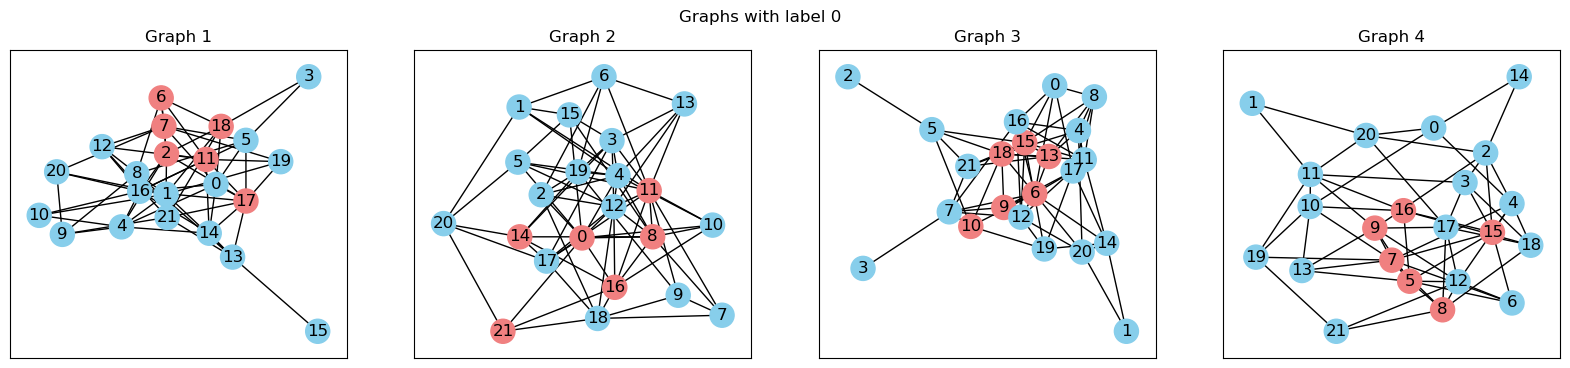

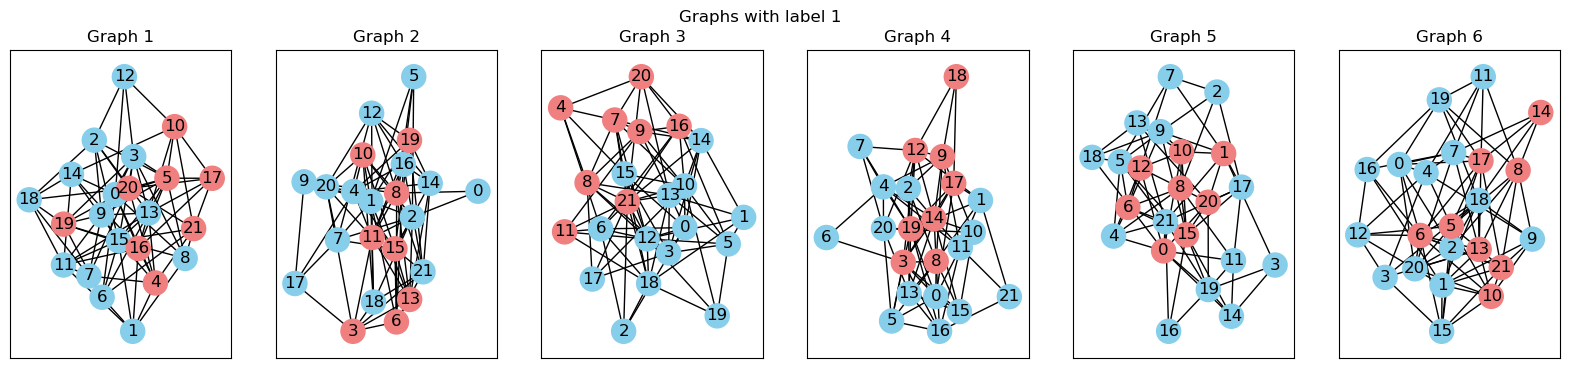

In [10]:
for label in set([label for _, _, _, label in dataset]):
    graphs = [(nx.Graph(graph), motifs) for graph, motifs, _, l in dataset if l == label]
    fig, axs = plt.subplots(1, len(graphs), figsize=(20, 4))
    fig.suptitle(f"Graphs with label {label}")
    for i, (graph, motifs) in enumerate(graphs):
        axs[i].set_title(f"Graph {i+1}")
        pos = nx.spring_layout(graph)
        # there is only one motif in the list for this binary classification problem
        node_colors = ['lightcoral' if node in motifs[0] else 'skyblue' for node in graph.nodes]
        nx.draw_networkx(graph, pos=pos, node_color=node_colors, ax=axs[i])
    plt.show()

In [4]:
# save dataset to file
graph.save_dataset(dataset_name='graphGenDataset10')

In [3]:
# generate a larger dataset
graph = GraphWithMotifsDataset(
    num_graphs=100,
    min_nodes=80,
    max_nodes=120,
    base_graph_model='ER',
    motif_graph_model='BA',
    p=0.3,
    m=3,
    min_motif_size=5,
    max_motif_size=8,
    min_num_motifs=1,
    max_num_motifs=1,
)
graph.generate_dataset()
graph.save_dataset(dataset_name='graphGenDataset100')